In [3]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy
DATE,,,,,,,,,,,
2016-01-01,113.491,2001.0,7.0,49774.0,143.4,4.6,143.4,3.77,108209.0,10211.7,20.573
2016-02-01,113.491,2001.0,7.0,49774.0,143.4,4.6,143.4,3.77,108209.0,10223.4,20.573
2016-03-01,113.491,2001.0,7.0,49774.0,143.4,4.6,143.4,3.77,108209.0,10254.4,20.573
2016-04-01,113.491,2001.0,7.0,49774.0,143.4,4.6,143.4,3.77,108209.0,10233.1,20.573
2016-05-01,113.491,2001.0,7.0,49774.0,143.4,4.6,143.4,3.77,108209.0,10214.7,20.573


In [5]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

In [6]:
# Correlation
df.corr()

,CSUSHPISA,Per_Capita_GDP,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy
CSUSHPISA,1.000000,0.908526,0.903895,-0.445435,0.903895,0.073251,0.762767,0.820717,0.852693
Per_Capita_GDP,0.908526,1.000000,0.922063,-0.392578,0.922063,-0.142911,0.941791,0.942707,0.936516
CPI,0.903895,0.922063,1.000000,-0.224930,1.000000,-0.251704,0.879650,0.882179,0.936392
UNRATE,-0.445435,-0.392578,-0.224930,1.000000,-0.224930,-0.514382,-0.179188,-0.180274,-0.109187
Cons_Materials,0.903895,0.922063,1.000000,-0.224930,1.000000,-0.251704,0.879650,0.882179,0.936392
FEDFUNDS,0.073251,-0.142911,-0.251704,-0.514382,-0.251704,1.000000,-0.366669,-0.315202,-0.343429
Num_Households,0.762767,0.941791,0.879650,-0.179188,0.879650,-0.366669,1.000000,0.950102,0.950551
Income,0.820717,0.942707,0.882179,-0.180274,0.882179,-0.315202,0.950102,1.000000,0.958488
Subsidy,0.852693,0.936516,0.936392,-0.109187,0.936392,-0.343429,0.950551,0.958488,1.000000


In [7]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

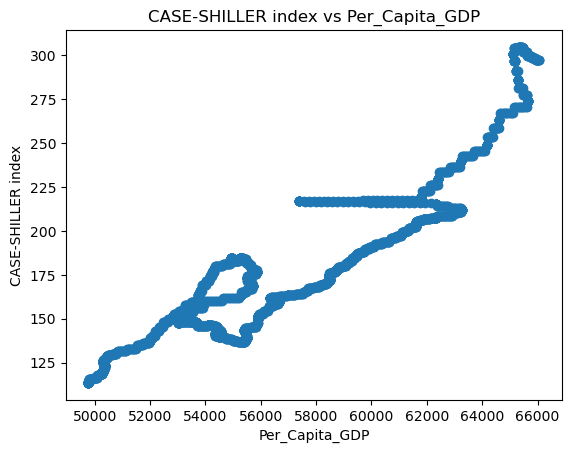

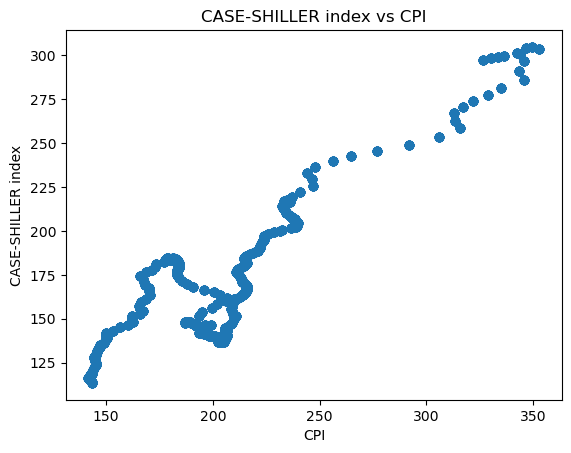

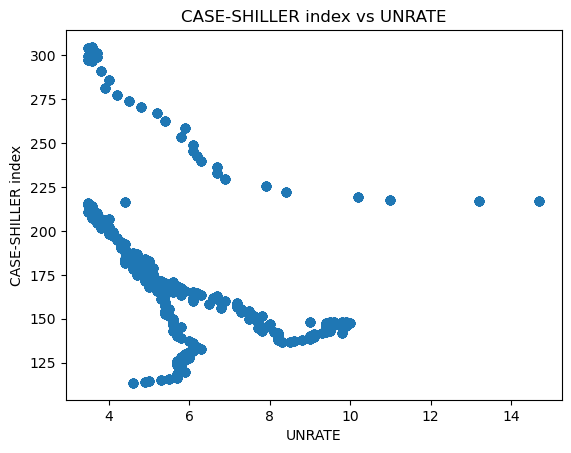

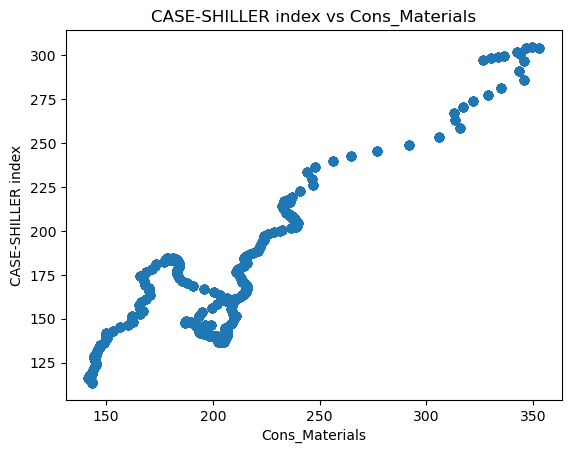

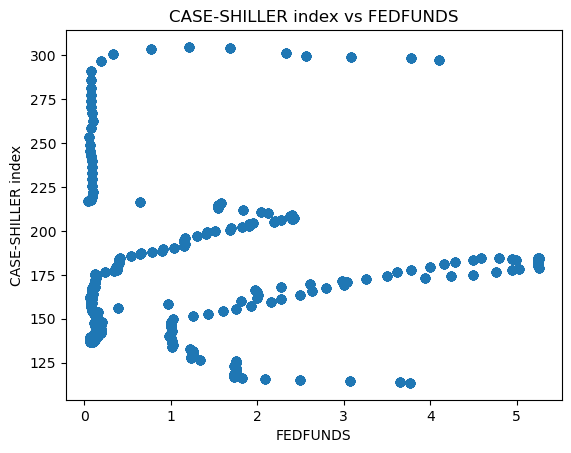

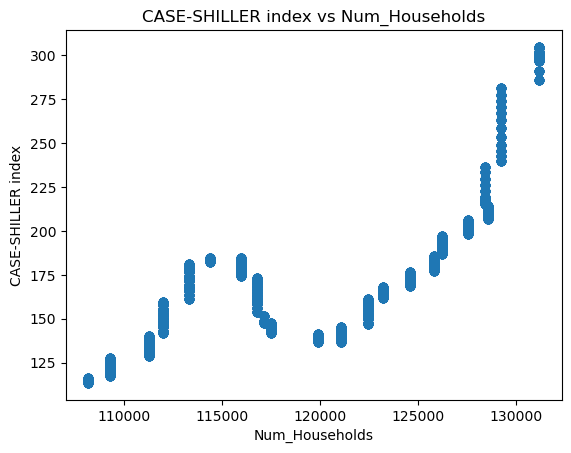

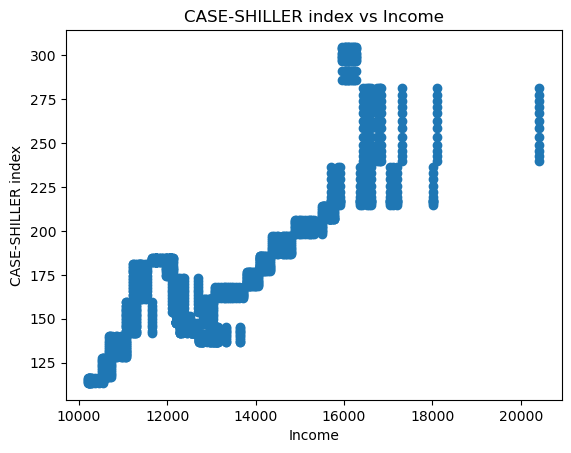

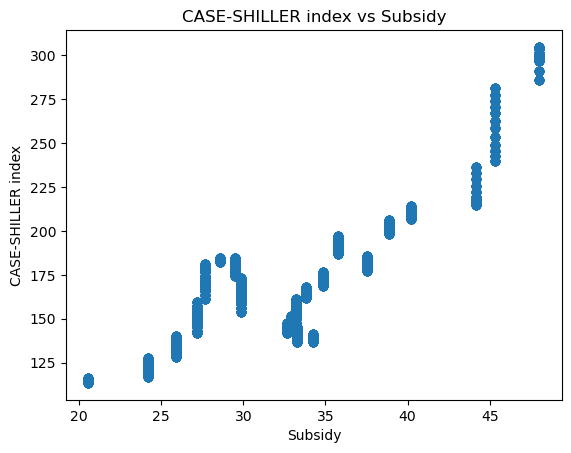

In [8]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

# From the correlation matrix and the scatter plots, the following conclusions can be made-
Impact of the great recession is reflected in almost all the plots.

Interest rates have a slight negative impact on the home prices.

All the other variables are positively correlated with the home prices.

In [9]:
# Dropping multicollinearity columns
mult_cols = [ "CPI", "Num_Households", 
             "Subsidy", "Cons_Materials", "Income"]
df.drop(columns = mult_cols, inplace = True)
X = df

Model Building

In [10]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [11]:
# Splitting data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [12]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = r2_score(pred, y_test)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.8521657498115156


The R2 score is close to 1. It means that model predicts the target variable with good accuracy.

In [13]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Per_Capita_GDP is 157.39749536365926
The coefficient for UNRATE is 13.860417875394267
The coefficient for FEDFUNDS is 34.64836994565797


In [14]:
# The intercept
print("The intercept is: ", model.intercept_)

The intercept is:  95.55938865080256


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)

# prediction
predRFR=RFR.predict(X_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))

R2_Score: 0.999875993918342
MAE: 0.10252383739850246
MSE: 0.2465806836520395
RMSE: 0.49656891128225045


In [23]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(X_train,y_train)

# prediction
predknn=knn.predict(X_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))

R2_Score: 0.9989867131923615
MAE: 0.15315121951219676
MSE: 2.014876612682924
RMSE: 1.4194634946637141


In [24]:
GB=GradientBoostingRegressor()
GB.fit(X_train,y_train)

# prediction
predGB=GB.predict(X_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))

R2_Score: 0.9986772425223548
MAE: 1.0740132845167298
MSE: 2.630245539434274
RMSE: 1.6218031753065087


In [25]:
ABR=AdaBoostRegressor()

ABR.fit(X_train,y_train)
# prediction
predABR=ABR.predict(X_test)
print('R2_Score:',r2_score(y_test,predABR))
print('MAE:',mean_absolute_error(y_test, predABR))
print('MSE:',mean_squared_error(y_test, predABR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predABR)))

R2_Score: 0.9655989733616287
MAE: 6.3904651918532105
MSE: 68.40494073684339
RMSE: 8.27072794479684


We know that the 4 features like Consumer Price Indes(CPI), Num_Houseolds, Subsidy, Cons Materials, and Income were having high correlation but they are the key factors or main factors. So will need to apply Cross Validation Techniques and Bagging regression on them in order to avoid overfitting and train the model well with this highly correlated features.

In [22]:
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy
DATE,,,,,,,,,,,
2016-01-01,113.491,2001.0,7.0,49774.0,143.4,4.6,143.4,3.77,108209.0,10211.7,20.573
2016-02-01,113.491,2001.0,7.0,49774.0,143.4,4.6,143.4,3.77,108209.0,10223.4,20.573
2016-03-01,113.491,2001.0,7.0,49774.0,143.4,4.6,143.4,3.77,108209.0,10254.4,20.573
2016-04-01,113.491,2001.0,7.0,49774.0,143.4,4.6,143.4,3.77,108209.0,10233.1,20.573
2016-05-01,113.491,2001.0,7.0,49774.0,143.4,4.6,143.4,3.77,108209.0,10214.7,20.573


In [24]:
df.tail()

,CSUSHPISA,Year,Month,Per_Capita_GDP,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy
DATE,,,,,,,,,,,
NaN,297.413,2022.0,12.0,66019.0,326.449,3.5,326.449,4.1,131202.0,16161.4,48.021
NaN,297.413,2022.0,12.0,66030.8,326.449,3.5,326.449,4.1,131202.0,16184.9,48.021
NaN,297.413,2022.0,12.0,66042.6,326.449,3.5,326.449,4.1,131202.0,16223.5,48.021
NaN,297.413,2022.0,12.0,66054.4,326.449,3.5,326.449,4.1,131202.0,16229.6,48.021
NaN,297.413,2022.0,12.0,66066.2,326.449,3.5,326.449,4.1,131202.0,16265.1,48.021


In [25]:
df.describe()

,CSUSHPISA,Year,Month,Per_Capita_GDP,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000
mean,176.626973,2011.765625,6.601562,56910.949219,208.151766,5.962109,208.151766,1.362813,120504.390625,13293.152604,33.868969
std,42.741946,6.230335,3.446210,4258.129339,46.549542,1.958537,46.549542,1.545294,6702.093694,1931.292688,6.545399
min,113.491000,2001.000000,1.000000,49774.000000,141.700000,3.500000,141.700000,0.050000,108209.000000,10211.700000,20.573000
25%,145.698500,2006.000000,4.000000,54100.000000,182.100000,4.600000,182.100000,0.120000,114384.000000,11889.850000,28.604000
50%,169.575500,2012.000000,7.000000,55641.500000,205.950000,5.500000,205.950000,0.940000,121084.000000,12920.150000,33.283000
75%,192.938500,2017.000000,10.000000,59884.830000,222.575000,6.900000,222.575000,2.002500,126224.000000,14685.225000,37.550000
max,304.724000,2022.000000,12.000000,66066.200000,353.015000,14.700000,353.015000,5.260000,131202.000000,20422.600000,48.021000


In [26]:
df.isnull().sum()

CSUSHPISA         0
Year              0
Month             0
Per_Capita_GDP    0
CPI               0
UNRATE            0
Cons_Materials    0
FEDFUNDS          0
Num_Households    0
Income            0
Subsidy           0
dtype: int64

In [27]:
y = df.pop("CSUSHPISA")
X = df

In [28]:
# Splitting data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [29]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
scores = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 5)
scores

array([0.96903117, 0.96661532, 0.96860181, 0.95419244, 0.97055978])

In [33]:
print (np.mean(scores))

0.9658001031272707


In [35]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model,X_test,y_test)
pred

array([186.70855164, 153.80241791, 218.97921234, 123.54961325,
       123.30257982, 238.15752027, 168.3671366 , 167.73009786,
       163.90874208, 166.53869712, 223.34779015, 222.90010316,
       159.72558117, 290.96578987, 152.82189931, 125.04875205,
       285.9760706 , 125.3042832 , 147.66686091, 176.53421481,
       206.0472683 , 150.7377271 , 152.01447162, 250.11461079,
       126.12755053, 205.2829287 , 162.35362654, 143.52226916,
       129.34537302, 163.69810883, 295.12299805, 212.12148713,
       293.10275544, 177.29729603, 125.61470051, 151.96020874,
       151.51493006, 144.78068926, 126.13063144, 222.69652286,
       149.71940793, 149.53996361, 124.09458128, 275.72471614,
       179.2402508 , 149.67668139, 267.52224182, 211.48527873,
       154.12725521, 138.21294996, 139.72252859, 167.33306372,
       112.96875173, 162.73084744, 167.92079824, 172.07570057,
       153.09305384, 286.80650885, 135.10363177, 151.12022471,
       152.19876094, 151.91470017, 179.73183509, 113.37

In [36]:
scores_test = cross_val_score(model, X_test, y_test, cv =5)
scores

array([0.96903117, 0.96661532, 0.96860181, 0.95419244, 0.97055978])

In [39]:
print(np.mean(scores_test))

0.9656443756362056


# As We can see that using cross validation technique we get the score of 96% on training and predicting. 

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor

In [42]:
y

DATE
2016-01-01    113.491
2016-02-01    113.491
2016-03-01    113.491
2016-04-01    113.491
2016-05-01    113.491
               ...   
NaN           297.413
NaN           297.413
NaN           297.413
NaN           297.413
NaN           297.413
Name: CSUSHPISA, Length: 3072, dtype: float64

In [43]:
X

,Year,Month,Per_Capita_GDP,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy
DATE,,,,,,,,,,
2016-01-01,2001.0,7.0,49774.0,143.400,4.6,143.400,3.77,108209.0,10211.7,20.573
2016-02-01,2001.0,7.0,49774.0,143.400,4.6,143.400,3.77,108209.0,10223.4,20.573
2016-03-01,2001.0,7.0,49774.0,143.400,4.6,143.400,3.77,108209.0,10254.4,20.573
2016-04-01,2001.0,7.0,49774.0,143.400,4.6,143.400,3.77,108209.0,10233.1,20.573
2016-05-01,2001.0,7.0,49774.0,143.400,4.6,143.400,3.77,108209.0,10214.7,20.573
...,...,...,...,...,...,...,...,...,...,...
NaN,2022.0,12.0,66019.0,326.449,3.5,326.449,4.10,131202.0,16161.4,48.021
NaN,2022.0,12.0,66030.8,326.449,3.5,326.449,4.10,131202.0,16184.9,48.021
NaN,2022.0,12.0,66042.6,326.449,3.5,326.449,4.10,131202.0,16223.5,48.021


In [46]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)

# prediction
predRFR=RFR.predict(X_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))

R2_Score: 0.9999916739068107
MAE: 0.028523154471670562
MSE: 0.016556073083899905
RMSE: 0.12867040484858944


In [47]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(X_train,y_train)

# prediction
predknn=knn.predict(X_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))

R2_Score: 0.9980850058227716
MAE: 0.9964926829268279
MSE: 3.8078823804227544
RMSE: 1.9513796095129092


In [50]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    'n_neighbors': np.arange(1, 21),  # K values from 1 to 20
    'weights': ['uniform', 'distance'],  # Weight options
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [54]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

In [55]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [56]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [61]:
FinalModel=KNN(n_neighbors= 2, p= 1, weights= 'distance')
FinalModel.fit(X_train, y_train)
predFinalModel=FinalModel.predict(X_test)
print('R2_Score:',r2_score(y_test,predFinalModel))
print('MAE:',mean_absolute_error(y_test, predFinalModel))
print('MSE:',mean_squared_error(y_test, predFinalModel))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predFinalModel)))

R2_Score: 0.9986451994925502
MAE: 0.6900963995300954
MSE: 2.6939617063340906
RMSE: 1.6413292498259118


In [63]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(X_train,y_train)

# prediction
predBR=BR.predict(X_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))

R2_Score: 0.9999814033985486
MAE: 0.0332525203252191
MSE: 0.036978530715446836
RMSE: 0.19229802577105892


As we can see that dataset is highly correlated can be over so we can select our final model Bagging Regressor and CrossValidation Regressor and among Bagging Regression is giving the best Accuracy.